### H(x) = 2 * x + 1

In [6]:
import torch
from torch import optim
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
# Colab에서 출력 지우기와 위젯 사용을 위한 모듈 임포트
from IPython.display import clear_output, display
import ipywidgets as widgets


In [7]:
# 데이터셋 생성
n = 30

x1 = torch.arange(0, 30, 1)
y1= 2 * x1 + 1

# 난수를 y값에 추가
# y = y + torch.randn(y.shape)
y1 = y1 + torch.randn(n) * 3
# *3 한 이유 : 조금 더 노이즈를 주기 위해
print(y1.shape)

# 1차원을 2차원으로
y2 = y1.reshape(-1,1)
x2 = x1.reshape(-1,1)
print(x1.shape, y1.shape, x2.shape, y2.shape)
print(x1.ndim, y1.ndim, x2.ndim, y2.ndim)

print(type(x1), type(y1), type(x2), type(y2))

torch.Size([30])
torch.Size([30]) torch.Size([30]) torch.Size([30, 1]) torch.Size([30, 1])
1 1 2 2
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>


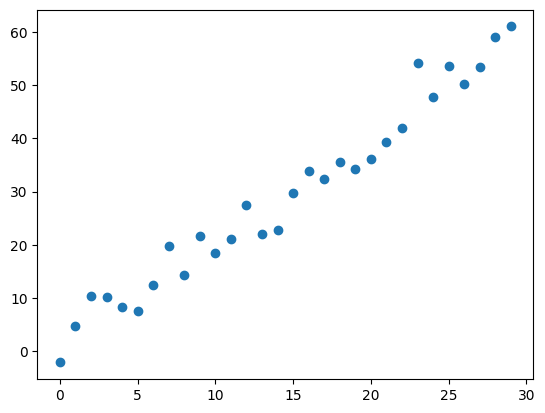

In [8]:
# 그래프로 찍어보기!

plt.scatter(x2,y2)

In [9]:
# 하이퍼파라미터 설정
epochs = 150
lr = 0.0003

# w = torch.zeros(1, requires_grad=True)
# b = torch.zeros(1, requires_grad=True)

# 초기값을 특정해줌
w = torch.tensor([1.98], requires_grad = True)
b = torch.tensor([0.97], requires_grad = True)

# 1. 모델 정의
model = x2 * w + b

# 2. 손실함수 정의
loss = nn.MSELoss()

# 3. 옵티마이저 정의
optimizer = optim.SGD([w,b], lr=lr)

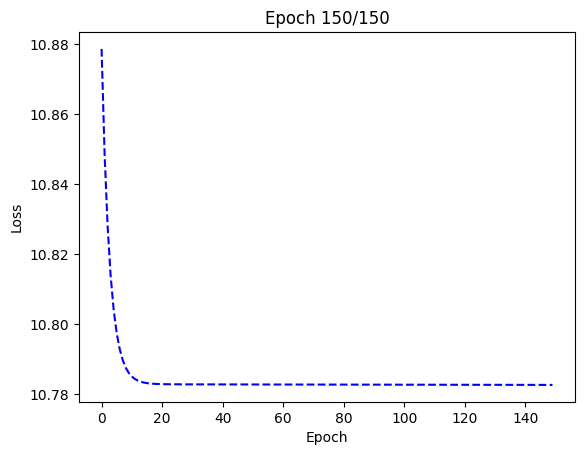

w : 1.96188, b : 0.966126


In [10]:
# 모델 학습 + 시각화
epoch_list = []
loss_list = []

import time

for epoch in range(epochs):
    y_pred = x2 * w + b
    cost = loss(y_pred, y2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    epoch_list.append(epoch)
    loss_list.append(cost.item())

    clear_output(wait=True)
    if epoch > 3:
        plt.figure()
        plt.plot(epoch_list, loss_list, 'b--')

        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Epoch {epoch+1}/{epochs}')
        plt.show()


    print(f'w : {round(w.item(),6)}, b : {round(b.item(),6)}')

In [11]:
# 모델 평가

